Inspired by:
http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

In [16]:
from collections import defaultdict
from matplotlib import patches
from scipy import io
import collections
import csv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import powerlaw
import plfit_py
import scipy as sci 
import statistics 

In [1]:
def build_graph(inf_data, artist_data):
    """
    Returns the directed graph of artistic influeence taken from influence_data.csv
       
    Parameters
    ----------
    inf_data : the file influence_data.csv
    arist_data : the file data_by_artist.csv
    
    Returns
    -------
    graph : a NetworkX directed graph

    Notes
    -----
    """
    graph = nx.DiGraph()
    for row in inf_data:
        if graph.has_node(row[0]) is False:	
            graph.add_node(row[0], name = row[1], genre = row[2], active_start = row[3] )
        if graph.has_node(row[4]) is False:
            graph.add_node(row[4], name = row[5], genre = row[6], active_start = row[7])
        graph.add_edge(row[4],row[0])
    # Add more attributes to our nodes
    for row in artist_data:
        for node in graph:
            if row[1] == node:
                graph.nodes[node]["danceability"] = row[2]
                graph.nodes[node]["energy"] = row[3]
                graph.nodes[node]["valence"] = row[4]
                graph.nodes[node]["tempo"] = row[5]
                graph.nodes[node]["loudness"] = row[6]
                graph.nodes[node]["key"] = row[8]
                graph.nodes[node]["acousticness"] = row[9]
                graph.nodes[node]["instrumentalness"] = row[10]
                graph.nodes[node]["liveness"] = row[11]
                graph.nodes[node]["speechiness"] = row[12]
                graph.nodes[node]["duration_ms"] = row[13]
                graph.nodes[node]["popularity"] = row[14]
                graph.nodes[node]["count"] = row[15]
    # Is our graph an acyclic directed graph
    print("Our graph is an acyclic directed graph: " + str(nx.is_directed_acyclic_graph(graph)))

    # Check nodes
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    # Is this really the number of edges, I know that our graph is not acyclic but if it were there should be
    # n*(n-1)/2 edges, no?
    num_possible_edges = num_nodes*(num_nodes - 1)
    print("Our artistic influence network has " + str(num_nodes)+" artists.")
    print("Our artistic influence network has " + str(num_edges)+" edges out of a possible " + str(num_possible_edges) + " possible edges.")
    print("Our network density is: " + str(nx.density(graph)))
    print("Our graph is strongly connected: " + str(nx.is_strongly_connected(graph)))
    print("The number of strongly connected components is: " + str(nx.number_strongly_connected_components(graph)))
    print("The average clustering coefficient is: " + str(nx.average_clustering(graph)))
    return graph

In [69]:
# As a csv.reader is usuable once and only once we write the lines of our csv file to a list 
with open("influence_data.csv", "rt") as infile:
    reader = csv.reader(infile)
    next(reader)
    influence_data = list(reader) 

# As a csv.reader is usuable once and only once we write the lines of our csv file to a list 
with open("data_by_artist.csv", "rt") as infile:
    reader = csv.reader(infile)
    next(reader)
    artist_data = list(reader) 

graph = build_graph(influence_data, artist_data)
print(list(nx.selfloop_edges(graph)))

Our graph is an acyclic directed graph: False
Our artistic influence network has 5603 artists.
Our artistic influence network has 42770 edges out of a possible 31388006 possible edges.
Our network density is: 0.0013626223978675167
Our graph is strongly connected: False
The number of strongly connected components is: 4747
The average clustering coefficient is: 0.09128001728442253
[]


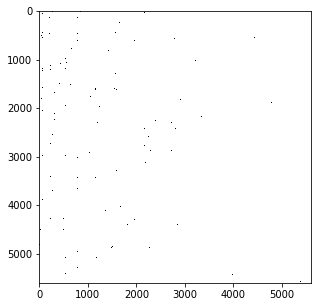

In [43]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(5, 5)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    '''
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = plt.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
    '''     
draw_adjacency_matrix(graph)

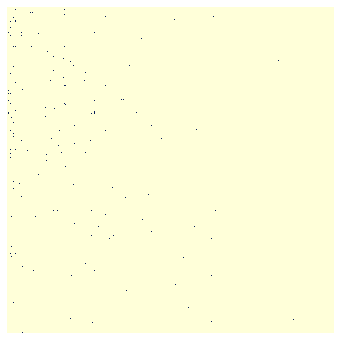

In [44]:
from nxviz import MatrixPlot

m = MatrixPlot(graph)
m.draw()

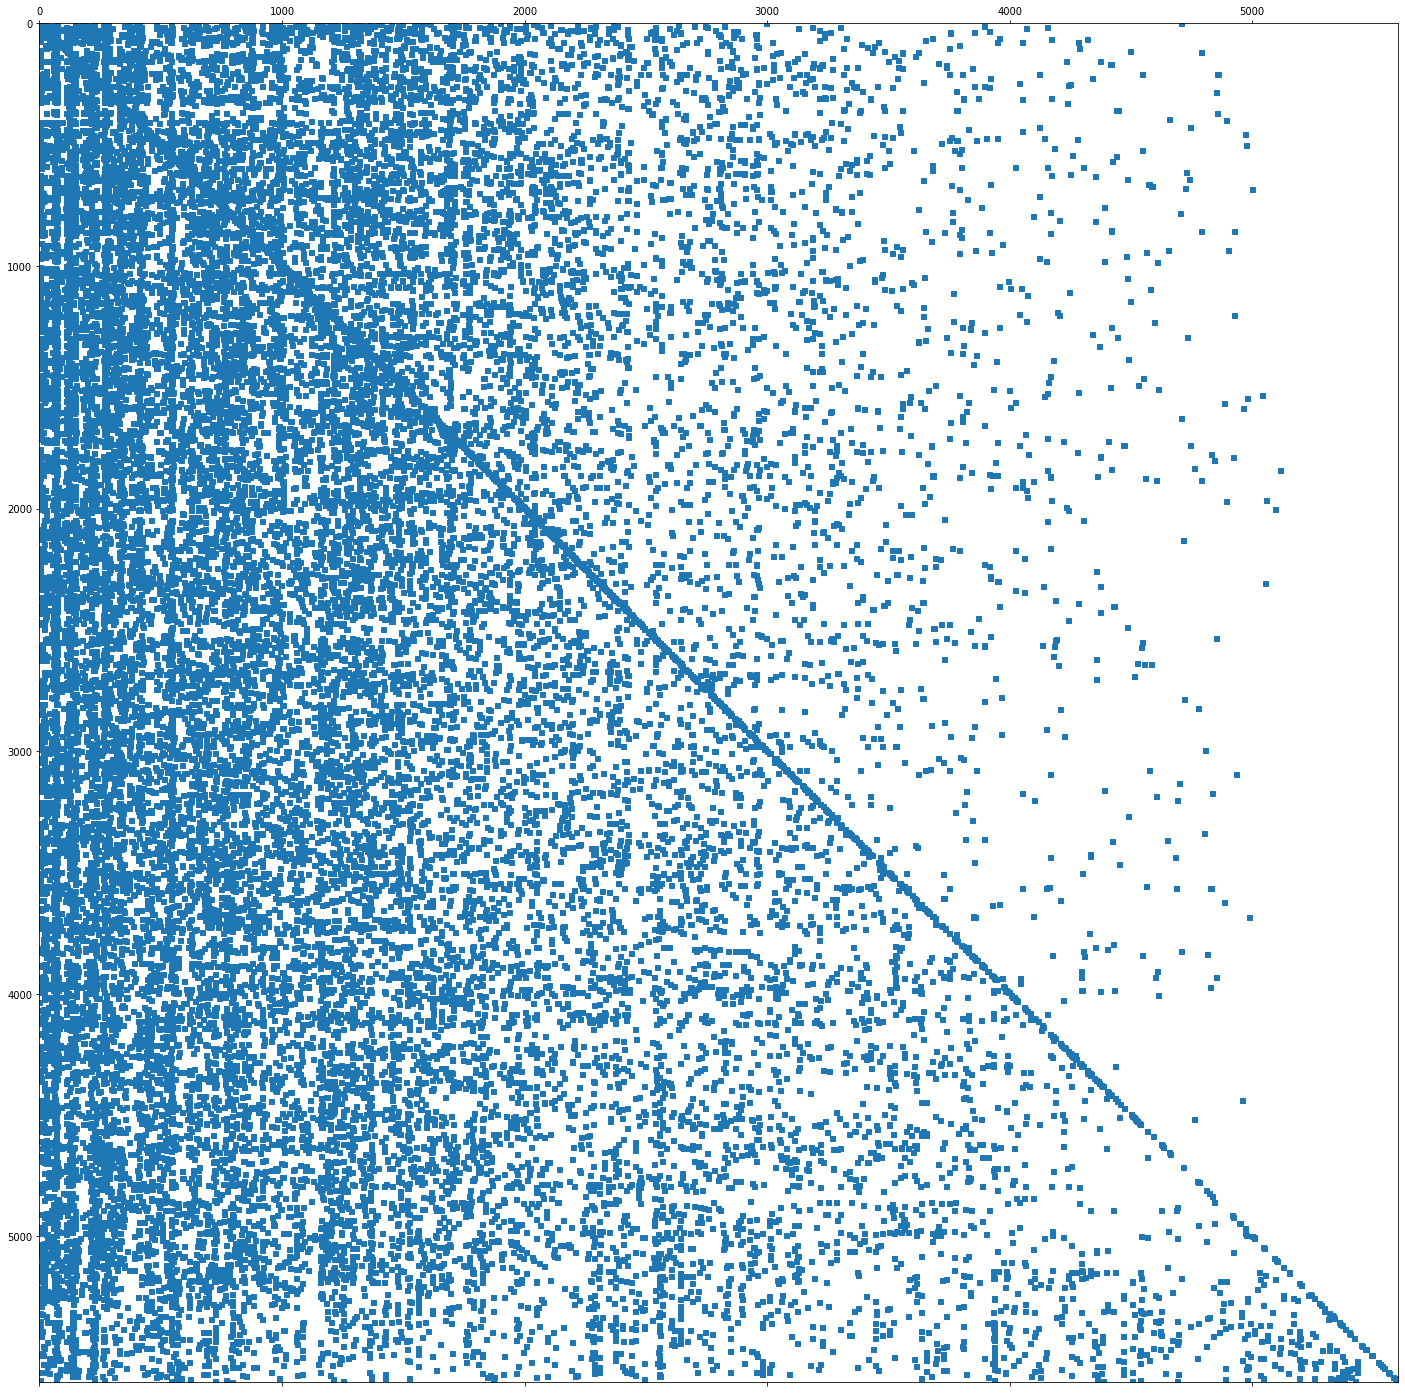

In [55]:
A = nx.adjacency_matrix(graph)
plt.figure(figsize=(25,25))
plt.spy(A, markersize = 5)

Why does it look as if the main diagonal of our adjacency matrix is filled, indicating that there is a self loop present? this is troubling 

In [75]:
connected_components = nx.strongly_connected_components(graph)
for component in connected_components:
        print(component)

{'532957'}
{'60679'}
{'898331'}
{'753094'}
{'898336'}
{'403120'}
{'1006782'}
{'797881'}
{'79016', '13511', '608701', '259529', '82831', '959770'}
{'805930'}
{'3829'}
{'276085'}
{'82584'}
{'287604'}
{'138837'}
{'783025'}
{'315909'}
{'317093'}
{'748773'}
{'369270'}
{'197040'}
{'960674'}
{'343396'}
{'309328'}
{'486305'}
{'204714'}
{'527379'}
{'176936'}
{'931567'}
{'269972'}
{'74970'}
{'301955'}
{'23290'}
{'206967'}
{'49806'}
{'64817'}
{'39661'}
{'342768'}
{'848784'}
{'81083'}
{'200775'}
{'577531'}
{'549797'}
{'98189'}
{'193160'}
{'583935'}
{'89713'}
{'112540'}
{'170690'}
{'825208'}
{'129547'}
{'225389'}
{'137494'}
{'654490'}
{'662800'}
{'77698'}
{'639789'}
{'792175', '162677', '346637', '261332'}
{'81796', '396372'}
{'928942'}
{'46861'}
{'120521'}
{'536754'}
{'607804'}
{'154533'}
{'389979'}
{'45057'}
{'246022'}
{'337856'}
{'74340'}
{'784527'}
{'790227'}
{'20403'}
{'353145'}
{'380704'}
{'947816'}
{'94205'}
{'290040'}
{'75171'}
{'490763'}
{'60306'}
{'954694'}
{'184502', '395819'}
{'359199'}

{'268990'}
{'126782'}
{'126862'}
{'127301'}
{'127898'}
{'128141'}
{'128143'}
{'167399'}
{'128231'}
{'128244'}
{'128873'}
{'146354'}
{'129254'}
{'743966'}
{'129551'}
{'129591'}
{'129945'}
{'371879'}
{'350585'}
{'130037'}
{'130418'}
{'130552'}
{'130686'}
{'130855'}
{'695019'}
{'130922'}
{'131603'}
{'132849'}
{'132856'}
{'133177'}
{'133420'}
{'133883'}
{'165068'}
{'133957'}
{'149173'}
{'133988'}
{'194039'}
{'134051'}
{'134761'}
{'135740'}
{'136124'}
{'137430'}
{'861687'}
{'137904'}
{'137980'}
{'138071'}
{'138235'}
{'138335'}
{'139212'}
{'139475'}
{'300013'}
{'139566'}
{'139655'}
{'778906'}
{'806740'}
{'141683'}
{'141774'}
{'141893'}
{'287860'}
{'142208'}
{'142963'}
{'143490'}
{'143749'}
{'143781'}
{'144629'}
{'145489'}
{'146478'}
{'146755'}
{'146796'}
{'147306'}
{'186805'}
{'147468'}
{'147771'}
{'147785'}
{'148004'}
{'158656'}
{'251033'}
{'148227'}
{'149102'}
{'150181'}
{'204968'}
{'674310'}
{'151240'}
{'924780'}
{'665908'}
{'151504'}
{'152384'}
{'153103'}
{'401114'}
{'153129'}
{'153630'}

{'3416601'}
{'3416819'}
{'3420473'}
{'3426731'}
{'3427505'}
{'3435164'}
{'284939'}
{'3441660'}
{'1391526'}
{'3445208'}
{'3446629'}
{'3449693'}
{'3451786'}
{'3455720'}
{'3455945'}
{'3460695'}
{'3462371'}
{'3462822'}
{'3462983'}
{'3469567'}
{'3474187'}
{'3474579'}
{'3475903'}
{'3477547'}
{'2385504'}
{'3480388'}
{'3486253'}
{'3506278'}
{'3511314'}
{'3513172'}
{'3523590'}
{'2659130'}
{'3535210'}
{'3539434'}
{'3559122'}
{'3567510'}
{'3606027'}
{'3006966'}
{'3632715'}
{'3637248'}
{'3639618'}
{'3659356'}
{'3661296'}
{'3661738'}
{'261309'}
{'2518003'}
{'2896351'}
{'3670556'}


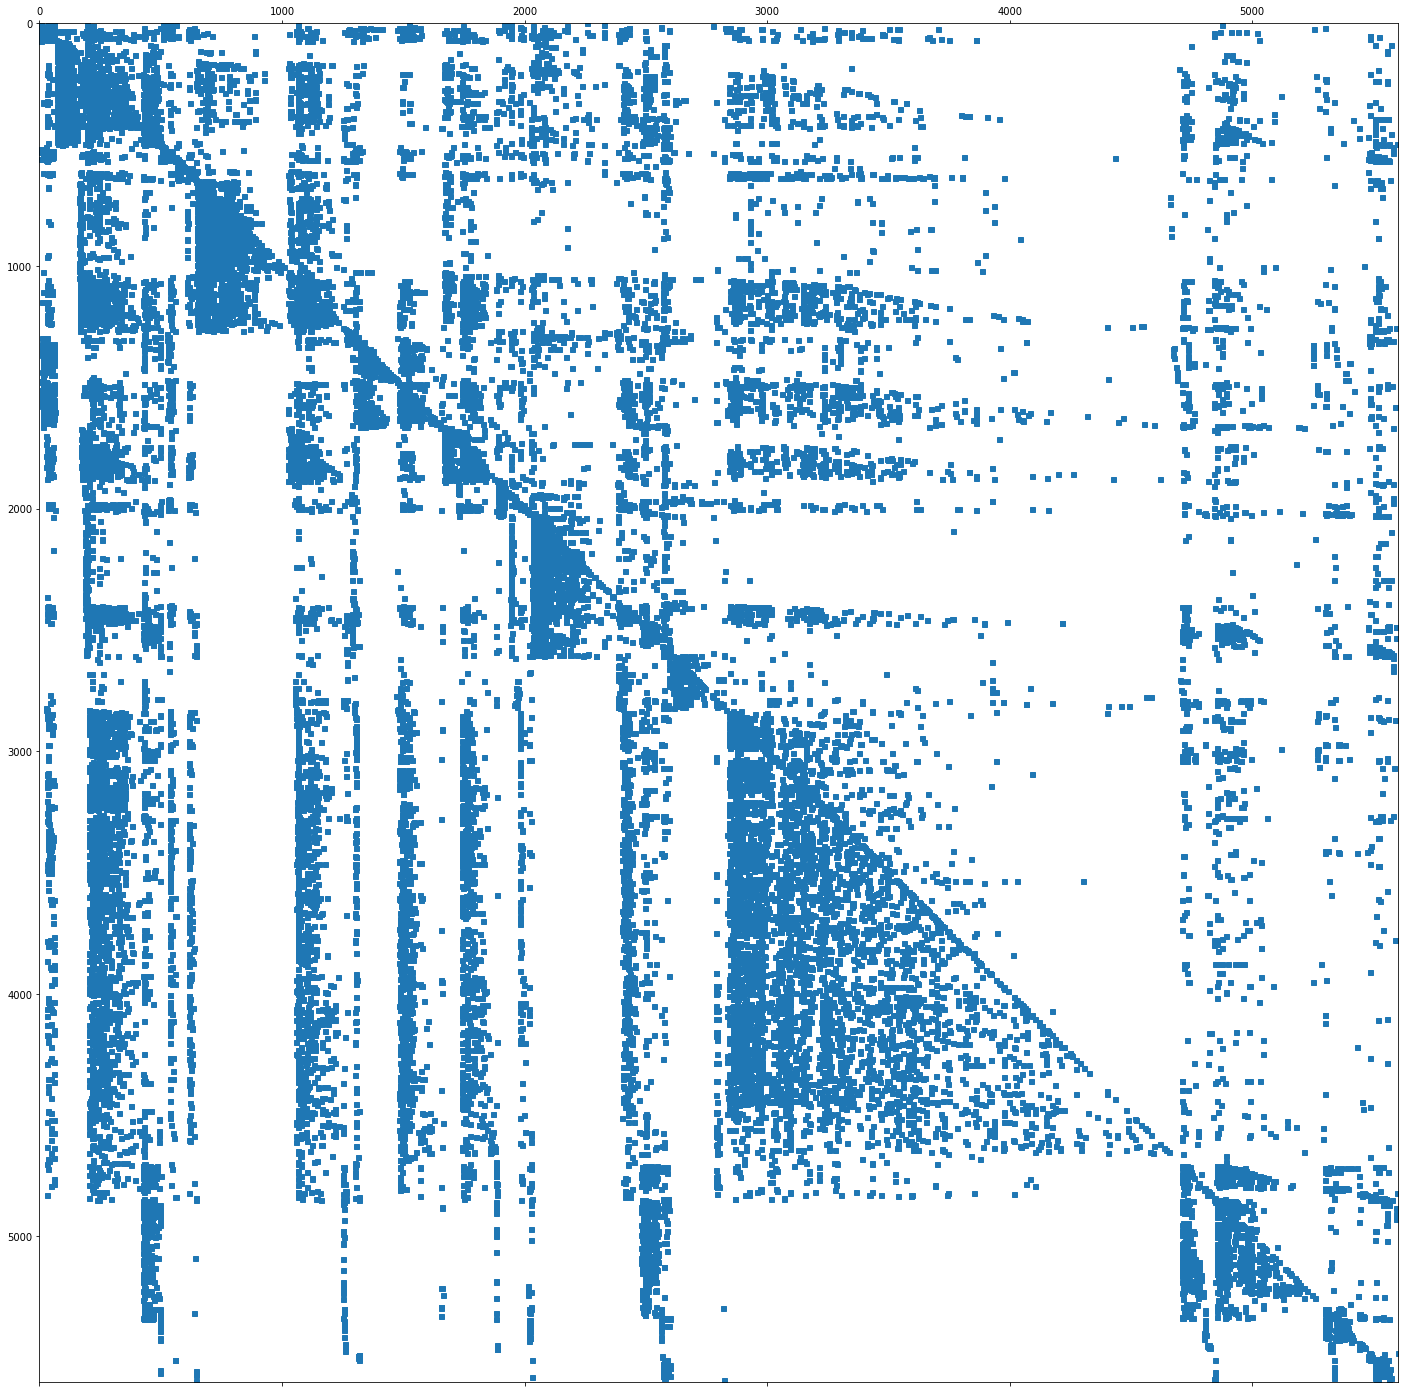

In [117]:
def build_graph_with_edge_attrib(inf_data, artist_data):
    """
    Returns the directed graph of artistic influeence taken from influence_data.csv
       
    Parameters
    ----------
    inf_data : the file influence_data.csv
    arist_data : the file data_by_artist.csv
    
    Returns
    -------
    graph : a NetworkX directed graph

    Notes
    -----
    """
    graph = nx.DiGraph()
    for row in inf_data:
        if graph.has_node(row[0]) is False:	
            graph.add_node(row[0], name = row[1],)
        if graph.has_node(row[4]) is False:
            graph.add_node(row[4], name = row[5])
        if row[2] == row[6]:
            if row[3] == row[7]:
                graph.add_edge(row[4],row[0], genre = row[2], active_start = row[3])
            if row[3] > row[7]:
                graph.add_edge(row[4],row[0], genre = row[2], active_start = row[3]+","+row[7])
            else:
                graph.add_edge(row[4],row[0], genre = row[2], active_start = row[7]+","+row[3])
        else:
            if row[3] == row[7]:
                graph.add_edge(row[4],row[0], genre = row[2]+","+row[6], active_start = row[3])
            if row[3] > row[7]:
                graph.add_edge(row[4],row[0], genre = row[2]+","+row[6], active_start = row[3]+","+row[7])
            else:
                graph.add_edge(row[4],row[0], genre = row[2]+","+row[6], active_start = row[7]+","+row[3])

    return graph

g = build_graph_with_edge_attrib(influence_data, artist_data)

def new_graph(g):
    new_g = nx.DiGraph()
    for a, b, data in sorted(g.edges(data=True), key=lambda x: x[2]['genre']):
        new_g.add_edge(a,b, genre = data['genre'])
        #print('{a} {b} {w}'.format(a=a, b=b, w=data['genre']))
    return new_g

new_g = new_graph(g)

Ag = nx.adjacency_matrix(new_g)
plt.figure(figsize=(25,25))
plt.spy(Ag, markersize = 5)

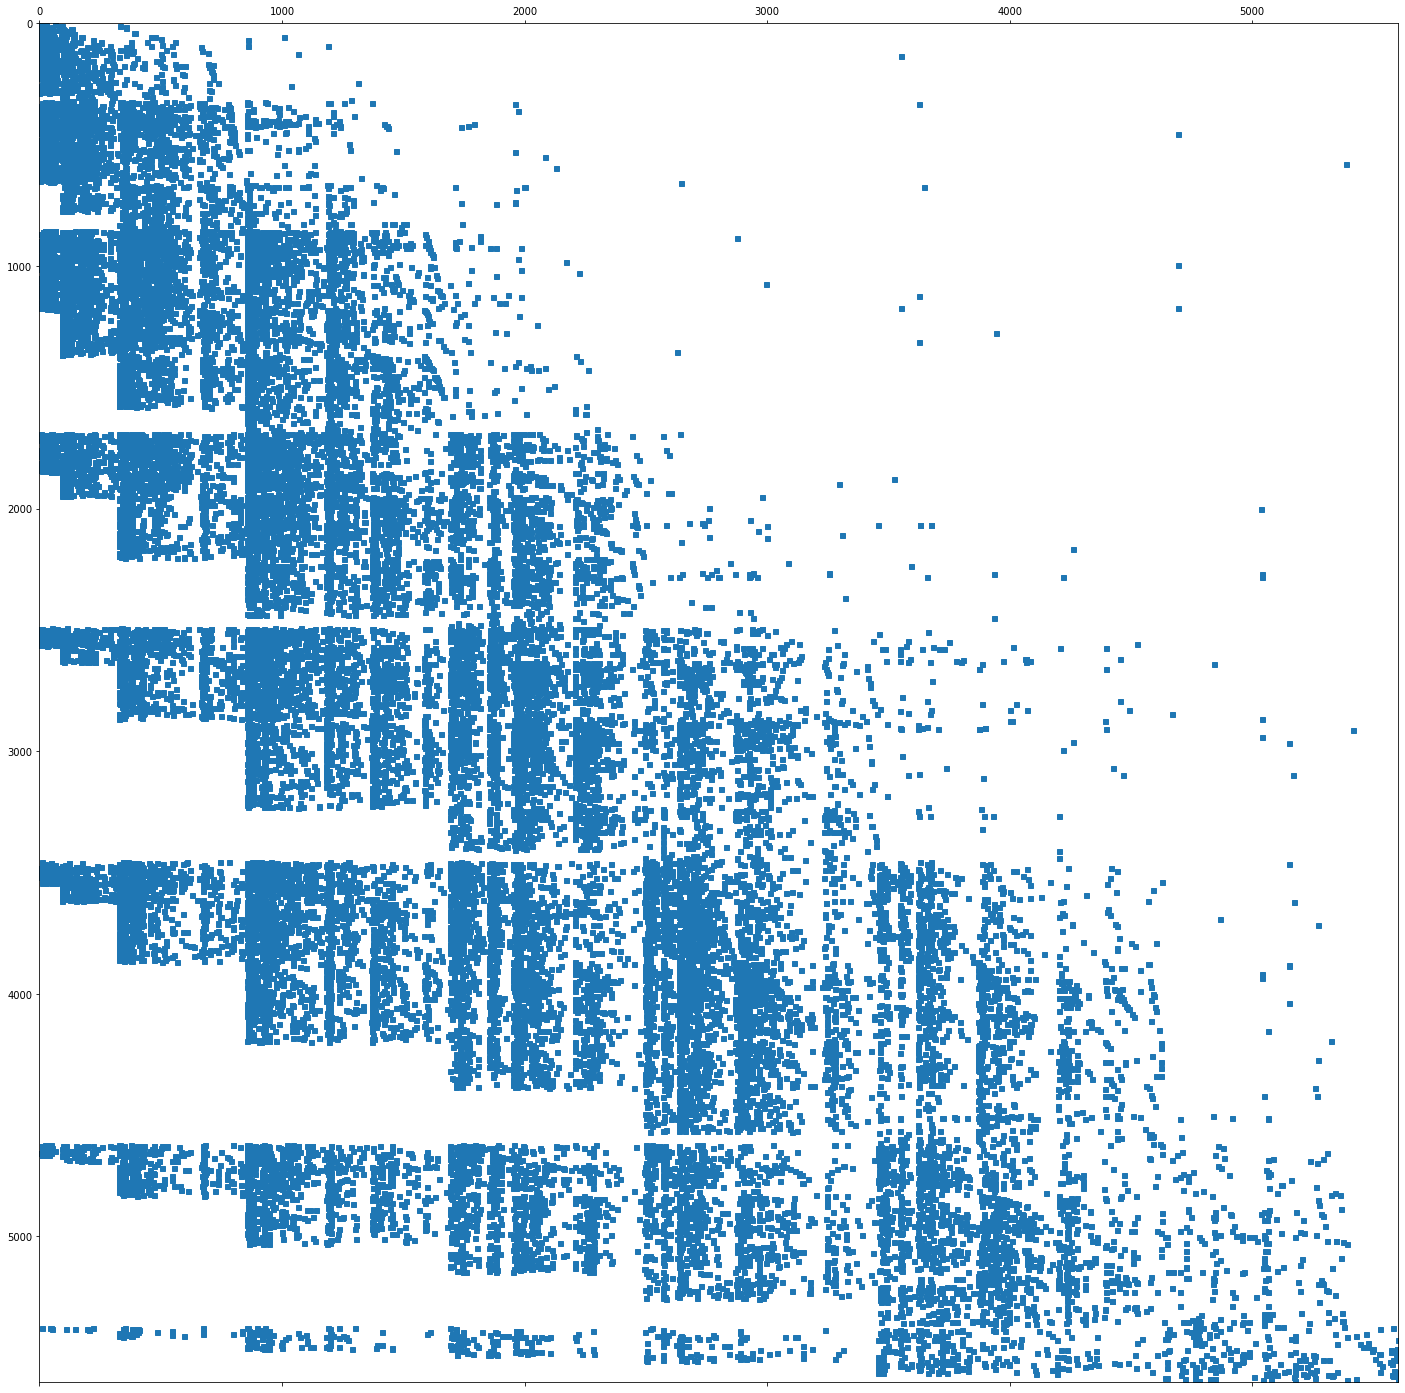

In [123]:
def build_graph_with_edge_attrib(inf_data, artist_data):
    """
    Returns the directed graph of artistic influeence taken from influence_data.csv
       
    Parameters
    ----------
    inf_data : the file influence_data.csv
    arist_data : the file data_by_artist.csv
    
    Returns
    -------
    graph : a NetworkX directed graph

    Notes
    -----
    """
    graph = nx.DiGraph()
    for row in inf_data:
        if graph.has_node(row[0]) is False:	
            graph.add_node(row[0], name = row[1],)
        if graph.has_node(row[4]) is False:
            graph.add_node(row[4], name = row[5])
        if row[2] == row[6]:
            if row[3] == row[7]:
                graph.add_edge(row[4],row[0], active_start = row[3])
            if row[3] > row[7]:
                graph.add_edge(row[4],row[0], active_start = row[3]+","+row[7])
            else:
                graph.add_edge(row[4],row[0], active_start = row[7]+","+row[3])
        else:
            if row[3] == row[7]:
                graph.add_edge(row[4],row[0], active_start = row[3])
            if row[3] > row[7]:
                graph.add_edge(row[4],row[0], active_start = row[3]+","+row[7])
            else:
                graph.add_edge(row[4],row[0], active_start = row[7]+","+row[3])

    return graph

g = build_graph_with_edge_attrib(influence_data, artist_data)

def new_graph(g):
    new_g = nx.DiGraph()
    for a, b, data in sorted(g.edges(data=True), key=lambda x: x[2]['active_start']):
        new_g.add_edge(a,b, genre = data['active_start'])
        #print('{a} {b} {w}'.format(a=a, b=b, w=data['genre']))
    return new_g

new_g = new_graph(g)

Ag = nx.adjacency_matrix(new_g)
plt.figure(figsize=(25,25))
plt.spy(Ag, markersize = 5)

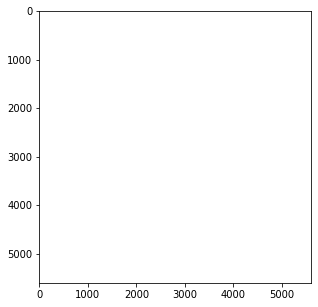

In [135]:
df = pd.read_csv('influence_data.csv')  

df_genre = df.sort_values(by=["influencer_main_genre","follower_main_genre"])

node_list_genre = []
for index, row in df_genre.iterrows():
    if row["influencer_id"] not in node_list_genre:
        node_list_genre.append(row["influencer_id"])
    if row["follower_id"] not in node_list_genre:
        node_list_genre.append(row["follower_id"])
draw_adjacency_matrix(graph,node_list_genre)
